### Importing packages

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"E:\DS&ML\Fraud_Detection.csv")

In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,636262.000000,6.362620e+05,6.362610e+05,6.362620e+05,6.362620e+05,6.362520e+05,636262.000000
mean,242.931935,1.800585e+05,8.317949e+05,8.528354e+05,1.096212e+06,1.221804e+06,0.001290
std,142.330857,6.069714e+05,2.885638e+06,2.921296e+06,3.375389e+06,3.656236e+06,0.035898
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,155.000000,1.340742e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,238.000000,7.481577e+04,1.423900e+04,0.000000e+00,1.315397e+05,2.147000e+05,0.000000
75%,334.000000,2.084988e+05,1.073000e+05,1.435652e+05,9.384820e+05,1.109230e+06,0.000000
max,742.000000,5.722962e+07,4.368662e+07,4.367380e+07,3.551855e+08,3.555534e+08,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636251 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636261 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636252 non-null  float64
 9   isFraud         636262 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 48.5+ MB


In [10]:
data.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
636257,False,False,False,False,False,False,False,False,False,False
636258,False,False,False,False,False,False,False,False,False,False
636259,False,False,False,False,False,False,False,False,False,False
636260,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isna().sum()

step               0
type              11
amount             0
nameOrig           0
oldbalanceOrg      1
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest    10
isFraud            0
dtype: int64

### TODO: Handel Missing rows
* type (11)
* oldbalanceOrg(1)
* newbalanceDest(10)

### Data Imputation
Rows/Cols with minimum missing values (like in the range of 1-10) can be deleted because it does not provide much significance and simplies the data analysis process.

In [14]:
cols_to_delete = ['oldbalanceOrg', 'newbalanceDest']
data.dropna(subset=cols_to_delete, inplace=True)

In [15]:
data.isna().sum()

step               0
type              11
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
dtype: int64

In [16]:
data['type'].describe()

count       636240
unique           5
top       CASH_OUT
freq        224207
Name: type, dtype: object

In [17]:
mode_dt = data['type'].mode()[0]
data['type'].fillna(mode_dt, inplace=True)

In [18]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [19]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0
5,208,CASH_IN,256440.86,C1001269496,554.00,256994.86,C1503528288,0.00,0.00,0
6,347,CASH_OUT,120989.98,C803141068,0.00,0.00,C1951883397,6963396.37,7084386.35,0
7,183,CASH_OUT,62655.01,C309960888,18997.00,0.00,C1715810305,130706.17,193361.18,0
8,184,CASH_OUT,256745.11,C1447987365,0.00,0.00,C1629212528,1475890.41,1732635.52,0
9,12,PAYMENT,13693.22,C243045039,9040.00,0.00,M55115072,0.00,0.00,0


In [20]:
X = data.drop(['isFraud'], axis=1)

y = data['isFraud']

In [21]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [22]:
!pip install category_encoders

In [23]:
# import category encoders

import category_encoders as ce

In [24]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0


The Columns are:
* step
* type
* amount
* nameOrig
* oldbalanceOrg
* newbalanceOrig
* nameDest
* oldbalanceDest
* newbalanceDest
* isFraud

In [34]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [35]:
X_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
316358,1,1,1,1,1,1,1,1,1
363422,2,2,2,2,2,2,2,2,2
463442,3,3,3,3,3,3,3,3,3
463944,4,4,4,4,4,2,4,4,4
453620,5,1,5,5,2,2,5,1,1


In [36]:
X_test.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
94998,40.0,5,-1.0,-1.0,41128.0,2.0,245911.0,-1.0,-1.0
605524,118.0,4,-1.0,-1.0,-1.0,-1.0,298330.0,1.0,-1.0
487460,32.0,1,-1.0,-1.0,2.0,2.0,-1.0,1.0,1.0
192010,47.0,1,-1.0,-1.0,2.0,2.0,-1.0,1.0,1.0
623699,111.0,1,-1.0,-1.0,38028.0,-1.0,-1.0,1.0,1.0


In [37]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [38]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [39]:
y_pred_gini = clf_gini.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9987


In [41]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9992


In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9992
Test set score: 0.9987


In [44]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [45]:
y_pred_en = clf_en.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9987


In [47]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9992


In [49]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9992
Test set score: 0.9987


### Confusion matrix

In [51]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[209680     10]
 [   265      8]]


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209690
           1       0.44      0.03      0.05       273

    accuracy                           1.00    209963
   macro avg       0.72      0.51      0.53    209963
weighted avg       1.00      1.00      1.00    209963



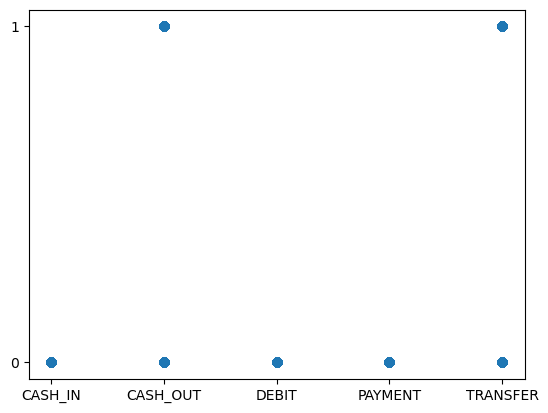

In [53]:
new_data_type = data['type'].astype(str)
new_data_fraud = data['isFraud'].astype(str)
plt.scatter(new_data_type, new_data_fraud)

C:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


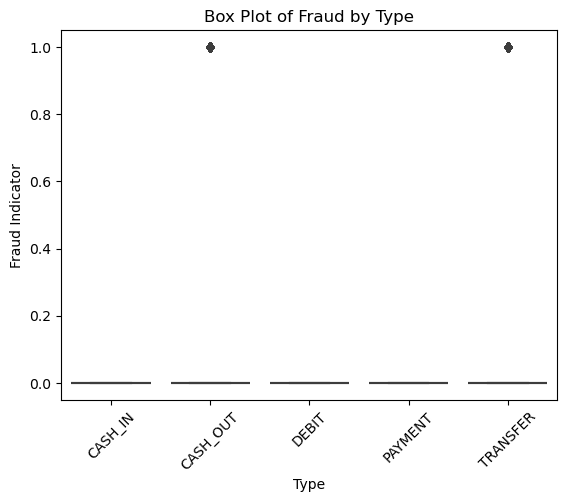

In [74]:
import seaborn as sns
# Combine the columns into one DataFrame
data['type'] = data['type'].astype('category')
data['isFraud'] = pd.to_numeric(data['isFraud'], errors='coerce')
combined_data = pd.DataFrame({'type': data['type'],   # Categorical variable
                              'isFraud': data['isFraud'] # Numeric variable
                             })
# Create the box plot
sns.boxplot(x='type', y='isFraud', data=combined_data)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Fraud Indicator')
plt.title('Box Plot of Fraud by Type')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()